# Assignment 4 - Unsupervised Learning and More Supervised Learning

## *YOUR FULL NAME HERE*
Netid:  *Your netid here*

## 1

### [35 points] Clustering

Clustering can be used to determine structure, assign group membership, and representing data through compression. Here you'll dive deeply into clustering exploring the impact of a number of classifiers on 

**(a)** Implement your own k-means algorithm. Demonstrate the efficacy of your algorithm on the `blobs` dataset from `scikit-learn` with 2 and 5 cluster centers. For each implementation rerun the k-means algorithm for values of k from 1 to 10 and for each plot the "elbow curve" where you plot the sum of square error. For each case, where is the elbow in the curve? Explain why.

**(b)** Briefly explain in 1-2 sentences each (and at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering

**(c)** For each of the clustering algorithms in (b) run each of them on the five datasets below. Tune the parameters in each model to achieve better performance. Plot the final result as a 4-by-5 subplot showing the performance of each method on each dataset. Which methods work best/worst on each dataset and why?
- Aggregation.txt
- Compound.txt
- D31.txt
- jain.txt

Each file has three columns: the first two are $x_1$ and $x_2$, then the third is a suggested cluster label (ignore this third column - do NOT include this in your analysis). *The data are from https://cs.joensuu.fi/sipu/datasets/*.

**ANSWER**

In [3]:
import numpy as np
class Kmeans:
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        pass
    def fit(self, X, epochs):
        init_center_index = np.random.randint(0, len(X), size=self.n_clusters)
        center_arr = X[init_center_index, :]
        
        for epoch in range(epochs):
            # assign observations to centers
            # 1: reshape x to (i, 1, j)
            X_reshape = X.reshape((X.shape[0], 1, X.shape[1]))
            # 2: [X - Y, X - Z] using broadcasting
            res = X_reshape - center_arr
            # 3: [(X - Y)^2, (X - Z)^2] multiply elementwise
            res_squ = res * res
            # 4: distance
            dis_vec = np.sum(res_squ, axis=2)          
            clusters = np.apply_along_axis(np.argmin, 1, dis_vec)
            
            # update centers
            for i in range(self.n_clusters):
                ci = X[clusters == i, :]
                center_arr[i, :] = np.average(ci, axis=0)
        
        # last update to clusters
        # 1: reshape x to (i, 1, j)
        X_reshape = X.reshape((X.shape[0], 1, X.shape[1]))
        # 2: [X - Y, X - Z] using broadcasting
        res = X_reshape - center_arr
        # 3: [(X - Y)^2, (X - Z)^2] multiply elementwise
        res_squ = res * res
        # 4: distance
        dis_vec = np.sum(res_squ, axis=2)          
        clusters = np.apply_along_axis(np.argmin, 1, dis_vec)
        return center_arr, clusters

In [8]:
from sklearn.datasets.samples_generator import make_blobs
num_cluster = 5
X, y = make_blobs(n_samples=500, centers=num_cluster, n_features=2, random_state=10)
kmeans = Kmeans(num_cluster)
centers, clusters = kmeans.fit(X, 50)

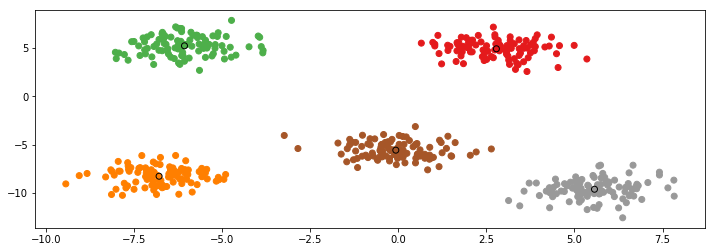

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="Set1")
plt.scatter(centers[:, 0], centers[:, 1], c=list(range(num_cluster)), cmap="Set1", edgecolors="black")
plt.show()

## 2

### [25 points] Visualizing and clustering digits with PCA and t-SNE

**(a)** Load the `scikit-learn` digits dataset. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the resulting 2-dimensional representation of the data.

**(b)** t-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/). A video introducing this method can be found [here](https://www.youtube.com/watch?v=RJVL80Gg3lA&list=UUtXKDgv1AVoG88PLl8nGXmw) for those who are interested.

*NOTE: An important note on t-SNE is that it is an example of transductive learning. This means that the lower dimensional representation of the data is only applicable to the specific input data - you can't just add a new sample an plot it in the sample 2-dimensional space without entirely rerunning the algorithm and finding a new representation of the data.*

**(c)** Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? Given the comparative clustering performance that you observed and the note on t-SNE above, what are the pros and cons of PCA and t-SNE? *Note: You typically will not have labels available.*

**ANSWER**

## 3

### [30 points] PCA for compression

From the digits dataset, extract all the 5's. Your going to create a compressed version of one of an image.

**(a)** Plot a number of examples of the original images.

**(b)** Perform PCA on the data. Create a plot showing the fraction of variance explained as you incorporate from $1$ to $N$ components. 

**(c)** Select an image (from your dataset of 5's) that you will "compress" using PCA. Use the principal components extracted in (b) for data compression: choose the top $k$ principal components and represent the data using a subset of the total principal components. Plot the original image, and compressed versions with different levels of compression (i.e. using different numbers of the top principal components): use $k=1,5,10,25$.

**(d)** How many principal components are required to well-approximate the data in (c)? How much compression is achieved in each case (express compression as the ratio of $k$ to the original dimension of the data $D$, so it ranges from $0$ to $1$). Comment on each case.

**ANSWER**

## 4

### [15 points] Build and test your own Neural Network for classification

There is no better way to understand how one of the core techniques of modern machine learning works than to build a simple version of it yourself. In this exercise you will construct and apply your own neural network classifier.

**(a)** Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit`, `predict`, and `predict_proba` methods. Your `fit` method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid. Choose your model architecture to have two input nodes, two hidden layers with five nodes each, and one output node.

**(b)** Create a training and test dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset. Adjust the learning rate and number of training epochs for your model to improve performance as needed. In two subplots, plot the training data on one, and the test data on the other. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC curve.

**(c)** Suggest at least two ways in which you neural network implementation could be improved.

**ANSWER**

In [4]:
from math import e, floor
# function utils
def sigmoid(z):
    return 1 / (1 + e**(-z))

def sigmoid_derive(a):
    sig = sigmoid(a)
    return sig * ((1 - sig))

def error(y, y_hat):
    return (1/2) * (y - y_hat) ** 2

def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

def lr_decay(decay, iter):
    return (1. / (1. + decay * iter))

In [5]:
import numpy as np

# fully connected layer
class fully_conn_layer:
    def __init__(self, last_num_neurons, current_num_neurons, activation, act_der):
        # j * i (he initialization)
        self.W = np.random.randn(current_num_neurons, last_num_neurons)*np.sqrt(2/last_num_neurons)
        self.activation = activation
        self.derive = act_der
        pass


# nn model
class neural_network:
    def __init__(self):
        self.layers = []
        pass

    def add(self, layer):
        self.layers.append(layer)

    # return output list (hiddens + output)
    def forward(self, X):
        num_layers = len(self.layers)
        z_list = [X.T]

        # the output of input (first hidden)
        a = self.layers[0].W.dot(X.T)  # act[(j, i) * (n, i).T] = (j, n)
        z = self.layers[0].activation(a)
        z_list.append(z)
        # other hiddens & output
        for i in range(1, num_layers):
            a = self.layers[i].W.dot(z) # act[(j, i) * (i, n)] = (j, n)
            z = self.layers[i].activation(a)
            z_list.append(z)
            pass

        return z_list

    # return adjustments
    def backward(self, X, y):
        z_list = self.forward(X)
        num_layers = len(self.layers)

        # derivatives
        deriv_lists = []
        # initial deriv = deriv_k (deriv for output)
        a_k = self.layers[-1].W.dot(z_list[-2])
        deriv = (z_list[-1] - y) * self.layers[-1].derive(a_k)
        deriv_lists = [deriv] + deriv_lists  # prepend to the front in order to preserse the order
        # deriv for hidden
        for j in range(num_layers - 2, -1, -1):  # (from "the second to last" to "the second" layer)
            # h'(a_i) * sum(w_ji * theta_j), whose shape is (i, 500)
            a_j = self.layers[j].W.dot(z_list[j])
            deriv = self.layers[j].derive(a_j) * (self.layers[j + 1].W.T.dot(deriv))
            deriv_lists = [deriv] + deriv_lists
            pass

        # adjustments
        w_change_list = []
        # first w ()
        w_change_list.append(deriv_lists[0].dot(X))  # (i, 500) * (500, num_input_feat)
        for i in range(1, num_layers):  # δ_j * z_i
            # for "deriv_lists": loop through all hiddens except the first plus output
            # for "a_list": loop through all hiddens)
            w_change_list.append(deriv_lists[i].dot(z_list[i].T))  # (j, 500) * (i, 500).T
            pass
        return w_change_list

    def fit(self, X, y, batch_size, num_epoch=100, lr=0.0001, verbose=True, is_decay=False, decay_step=100, decay_coef=0.0):
        num_layers = len(self.layers)

        for epoch in range(num_epoch):

            # rate decay
            if is_decay and epoch % decay_step == 0:
                lr *= lr_decay(decay_coef, epoch / decay_step)
                print("current lr: {}".format(lr))

            # batch
            if batch_size == len(y):
                w_change_list = self.backward(X, y)

                for i in range(num_layers):
                    self.layers[i].W = self.layers[i].W - (lr / len(y)) * w_change_list[i]
            # sgd or mini-batch
            else:
                num_obers = len(y)
                # 1. shuffle
                shuffle = np.arange(num_obers)
                np.random.shuffle(shuffle)
                X = X[shuffle]
                y = y[shuffle]

                # 2.
                num_batches = floor(num_obers / batch_size)
                remains = num_obers % batch_size
                remain_X, remain_y = X[num_obers - remains:num_obers], y[num_obers - remains:num_obers]

                # 3. loop through all batches
                    ## b_i: batch index
                for b_i in range(num_batches):
                    w_change_list = self.backward(X[b_i*batch_size: (b_i+1)*batch_size], y[b_i*batch_size: (b_i+1)*batch_size])
                    for i in range(num_layers):
                        self.layers[i].W = self.layers[i].W - (lr / len(y)) * w_change_list[i]
                if remains != 0:
                    w_change_list = self.backward(remain_X,
                                                  remain_y)
                    for i in range(num_layers):
                        self.layers[i].W = self.layers[i].W - (lr / len(y)) * w_change_list[i]
                pass

            # verbose
            if verbose:
                print("epoch {}: finished, cost = {}".
                      format(epoch, np.average(error(y, self.predict_proba(X).reshape(len(y))))))

    def predict_proba(self, X):
        return self.forward(X)[-1].T

    def predict(self, X, thresh=0.5):
        return np.where(self.predict_proba(X) > thresh, 1, 0)

In [12]:
import sklearn
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = sklearn.datasets.make_moons(600, noise=0.20)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1/6, random_state=42)

mu = X_train.mean(axis=0)
sig = X_train.std(axis=0)
X_train = (X_train - mu) / sig
X_test = (X_test - mu) / sig

# add bias term
X_train = np.column_stack((np.ones(len(X_train)),
                          X_train))
X_test = np.column_stack((np.ones(len(X_test)),
                          X_test))

nn = neural_network()
nn.add(fully_conn_layer(X_train.shape[1], 5, activation=sigmoid, act_der=sigmoid_derive))
nn.add(fully_conn_layer(5, 5, activation=sigmoid, act_der=sigmoid_derive))
nn.add(fully_conn_layer(5, 5, activation=sigmoid, act_der=sigmoid_derive))


nn.add(fully_conn_layer(5, 1, activation=sigmoid, act_der=sigmoid_derive))

y_hat_no_train = nn.predict(X_train, thresh=0.5).reshape(len(y_train))

nn.fit(X_train, y_train, batch_size=len(y), num_epoch=1000, lr=10, is_decay=False, decay_coef=1e-08, verbose=0)

y_hat = nn.predict(X_train, thresh=0.5).reshape(len(y_train))

print("cost before train: {}, accuracy: {}".
      format(np.average(error(y_train, y_hat_no_train)), accuracy(y_train, y_hat_no_train)))
print("cost after train: {}, accuracy: {}".
      format(np.average(error(y_train, y_hat)), accuracy(y_train, y_hat)))

cost before train: 0.241, accuracy: 0.518
cost after train: 0.011, accuracy: 0.978


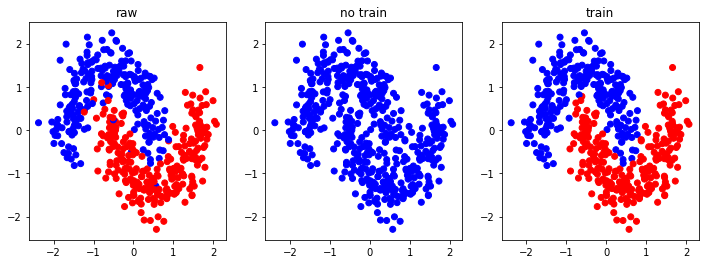

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.scatter(X_train[:, 1], X_train[:, 2], c=y_train, cmap="bwr")
plt.title("raw")
plt.subplot(132)
plt.scatter(X_train[:, 1], X_train[:, 2], c=y_hat_no_train.reshape(len(X_train)), cmap="bwr")
plt.title("no train")
plt.subplot(133)
plt.scatter(X_train[:, 1], X_train[:, 2], c=y_hat.reshape(len(X_train)), cmap="bwr")
plt.title("train")
plt.show()

accuracy: 0.95


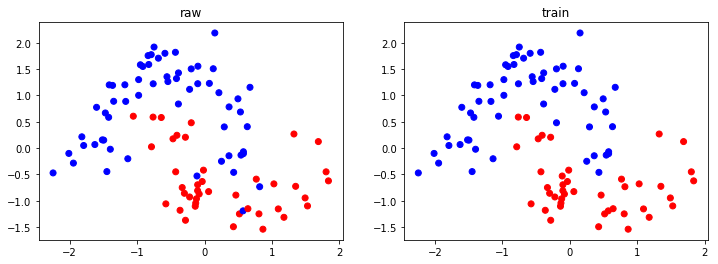

In [14]:
y_hat_test = nn.predict(X_test, thresh=0.5)

print("accuracy: {}".format(accuracy(y_test, y_hat_test.reshape(len(y_test)))))

import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_test[:, 1], X_test[:, 2], c=y_test, cmap="bwr")
plt.title("raw")
plt.subplot(122)
plt.scatter(X_test[:, 1], X_test[:, 2], c=y_hat_test.reshape(len(X_test)), cmap="bwr")
plt.title("train")
plt.show()

1. This model 